In [25]:
from langchain_groq import ChatGroq
from typing import TypedDict
from typing_extensions import Annotated
from langgraph.graph.message import add_messages, AnyMessage
from langgraph.graph import StateGraph, START, END
from langchain_community.tools.tavily_search import TavilySearchResults
from langgraph.prebuilt import ToolNode, tools_condition
from IPython.display import Image, display

In [9]:
llm = ChatGroq(model = "llama-3.3-70b-versatile", groq_api_key = "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")

In [10]:
class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

In [12]:
tool = TavilySearchResults(max_results = 2, tavily_api_key = "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")

In [14]:
tool.invoke("What is langgraph?")

[{'title': 'LangGraph - Overview - Docs by LangChain',
  'url': 'https://docs.langchain.com/oss/python/langgraph/overview',
  'content': 'Trusted by companies shaping the future of agents - including Klarna, Replit, Elastic, and more - LangGraph is a low-level orchestration framework for building, managing, and deploying long-running, stateful agents.',
  'score': 0.9405774},
 {'title': 'What is LangGraph? - Analytics Vidhya',
  'url': 'https://www.analyticsvidhya.com/blog/2024/07/langgraph-revolutionizing-ai-agent/',
  'content': 'To sum up, LangGraph is a major advancement in the development of AI agents. It enables developers to push the limits of what’s possible with AI agents by eliminating the shortcomings of earlier systems and offering a flexible, graph-based framework for agent construction and execution. LangGraph is positioned to influence the direction of artificial intelligence significantly in the future. [...] LangGraph is a library built on top of Langchain that is desi

In [30]:
def multiply(a: int, b: int)->int:
    """
    Multiply a and b

    Args:
        a (int): first int
        b (int): second int

    Returns:
        int: output int
    """
    return a * b

In [31]:
tools = [tool, multiply]

In [32]:
llm_with_tools = llm.bind_tools(tools)

In [33]:
def tool_calling_llm(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

In [34]:
builder_n = StateGraph(State)

In [35]:
builder_n.add_node("tool_calling_llm", tool_calling_llm)
builder_n.add_node("tools", ToolNode(tools))

builder_n.add_edge(START, "tool_calling_llm")
builder_n.add_conditional_edges("tool_calling_llm", tools_condition)
builder_n.add_edge("tools", END)

graph = builder_n.compile()

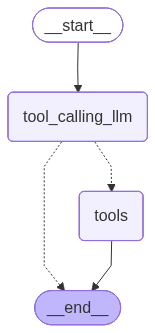

In [36]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [37]:
def get_response(query):
    response = graph.invoke({"messages": query})
    for m in response["messages"]:
        m.pretty_print()

In [28]:
print(get_response("What is recent ai news?"))

================================ Human Message =================================

What is recent ai news?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (jf746g6w7)
 Call ID: jf746g6w7
  Args:
    query: recent AI news
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "AI News | Latest AI News, Analysis & Events", "url": "https://www.artificialintelligence-news.com/", "content": "Applications · Malaysia launches Ryt Bank, its first AI-powered bank · Finance AI ; Computer Vision · US and Japan announce sweeping AI and tech collaboration.", "score": 0.72768575}, {"title": "The 2025 AI Index Report | Stanford HAI", "url": "https://hai.stanford.edu/ai-index/2025-ai-index-report", "content": "In 2024, U.S. federal agencies introduced 59 AI-related regulations—more than double the number in 2023—and issued by twice as many agencies. Globally, 

In [38]:
print(get_response("What is 2 multiplied by by 3"))

================================ Human Message =================================

What is 2 multiplied by by 3
================================== Ai Message ==================================
Tool Calls:
  multiply (ynk3mvxs4)
 Call ID: ynk3mvxs4
  Args:
    a: 2
    b: 3
================================= Tool Message =================================
Name: multiply

6
None


In [39]:
print(get_response("What is 2 multiplied by 4 and then multiplied by 2"))

================================ Human Message =================================

What is 2 multiplied by 4 and then multiplied by 2
================================== Ai Message ==================================
Tool Calls:
  multiply (wwe1tv122)
 Call ID: wwe1tv122
  Args:
    a: 2
    b: 4
  multiply (b1b3zxb89)
 Call ID: b1b3zxb89
  Args:
    a: 8
    b: 2
================================= Tool Message =================================
Name: multiply

8
================================= Tool Message =================================
Name: multiply

16
None
